In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:

# Simulated 3-arm bandit with unknown rewards
true_rewards = [0.2, 0.5, 0.8]  # Actual reward probabilities for 3 slot machines
num_actions = len(true_rewards)
num_episodes = 1000
epsilon = 0.1  # Exploration probability

returns = [[] for _ in range(num_actions)]  # Store returns for each action
Q = np.zeros(num_actions)  # Estimated Q-values
Q_history = np.zeros((num_episodes, num_actions))  # Store Q-values per episode



In [6]:
# Monte Carlo with ε-greedy exploration
for episode in range(num_episodes):
    # Select action using ε-greedy
    if np.random.rand() < epsilon:
        action = np.random.choice(num_actions)  # Explore (random action)
    else:
        action = np.argmax(Q)  # Exploit (best known arm)

    # Simulate reward from chosen action
    reward = np.random.binomial(1, true_rewards[action])  # Reward is 1 with probability true_rewards[action]

    # Store return and update Q-value (MC update: average of observed rewards)
    returns[action].append(reward)
    Q[action] = np.mean(returns[action])  # Average returns for the action

    # Track Q-values over time
    Q_history[episode] = Q  

# Print final estimated values
print(f"Final Estimated Q-values after {num_episodes} episodes: {Q}")
print(f"Best arm according to Monte Carlo estimation: Arm {np.argmax(Q) + 1}")


Final Estimated Q-values after 1000 episodes: [0.13559322 0.57692308 0.81092896]
Best arm according to Monte Carlo estimation: Arm 3


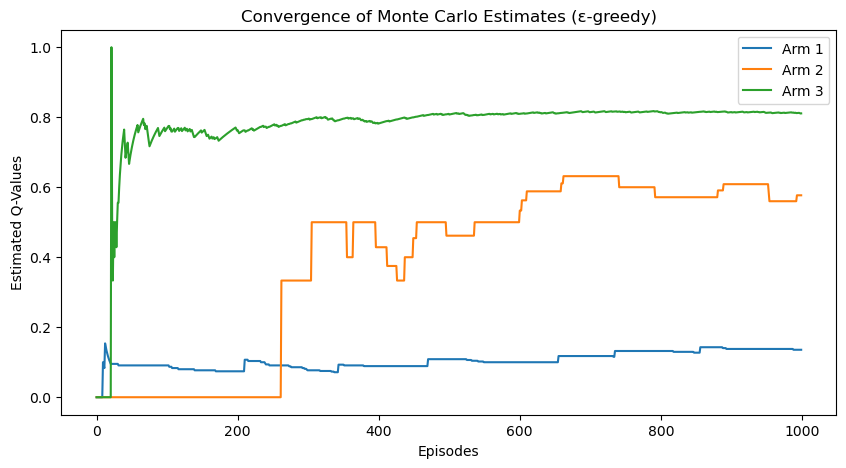

In [7]:
# Plot Q-value convergence over time
plt.figure(figsize=(10, 5))
plt.plot(Q_history)
plt.xlabel("Episodes")
plt.ylabel("Estimated Q-Values")
plt.title("Convergence of Monte Carlo Estimates (ε-greedy)")
plt.legend(["Arm 1", "Arm 2", "Arm 3"])
plt.show()

In [ ]:
print("Q-Table after training:")
print(Q)

Q-Table after training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


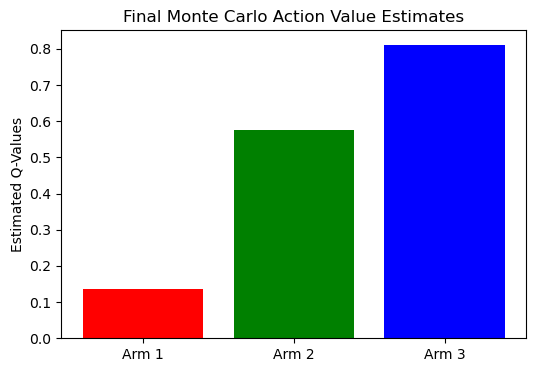

In [8]:
# Plot final learned Q-values
plt.figure(figsize=(6, 4))
plt.bar(range(num_actions), Q, color=['red', 'green', 'blue'])
plt.xticks(range(num_actions), ['Arm 1', 'Arm 2', 'Arm 3'])
plt.ylabel("Estimated Q-Values")
plt.title("Final Monte Carlo Action Value Estimates")
plt.show()